In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer = pd.read_csv('marketing_campaign.csv')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
customer.shape

(2240, 29)

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
customer.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
customer.nunique(axis = 0)   

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
missing_count = customer.isnull().sum()
value_count = customer.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_customer = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage})
print(missing_customer)

                     count  percentage
ID                       0        0.00
Year_Birth               0        0.00
Education                0        0.00
Marital_Status           0        0.00
Income                  24        1.07
Kidhome                  0        0.00
Teenhome                 0        0.00
Dt_Customer              0        0.00
Recency                  0        0.00
MntWines                 0        0.00
MntFruits                0        0.00
MntMeatProducts          0        0.00
MntFishProducts          0        0.00
MntSweetProducts         0        0.00
MntGoldProds             0        0.00
NumDealsPurchases        0        0.00
NumWebPurchases          0        0.00
NumCatalogPurchases      0        0.00
NumStorePurchases        0        0.00
NumWebVisitsMonth        0        0.00
AcceptedCmp3             0        0.00
AcceptedCmp4             0        0.00
AcceptedCmp5             0        0.00
AcceptedCmp1             0        0.00
AcceptedCmp2             

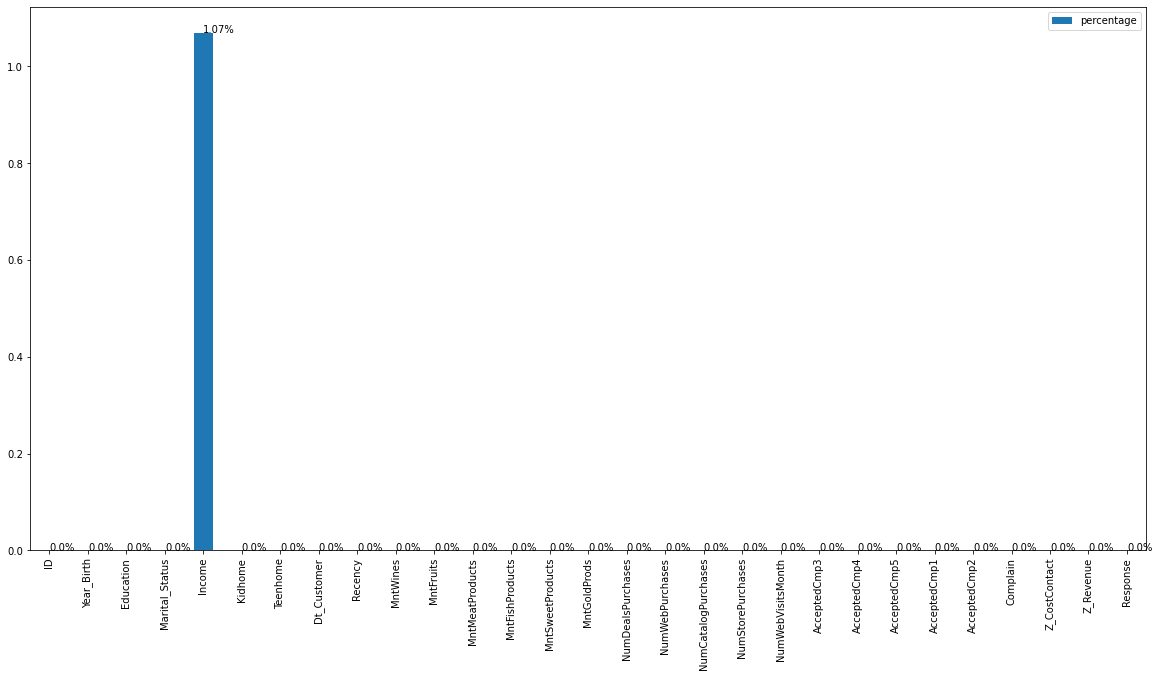

In [9]:
barchart = missing_customer.plot.bar(y = 'percentage', figsize = (20,10))

for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%')

In [10]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [12]:
customer["Income"].fillna (customer["Income"].mean (), inplace = True) 
customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
# Converting columns to DateTime format

customer['Year_Birth'] = pd.to_datetime(customer['Year_Birth'], format ='%Y')
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])

In [14]:
customer['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [15]:
customer['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
customer["Dt_Customer"].dt.year.min() , customer["Dt_Customer"].dt.year.max()

(2012, 2014)

In [17]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.

customer['Age'] = (customer["Dt_Customer"].dt.year.max()) - (customer['Year_Birth'].dt.year)
customer['Years_Customer'] = (customer["Dt_Customer"].dt.year.max()) - (customer['Dt_Customer'].dt.year)
customer['Days_Customer'] = (customer["Dt_Customer"].max()) - (customer['Dt_Customer'])

In [18]:
# Total amount spent on products

customer['Monetory'] = customer['MntWines'] + customer['MntFruits'] + customer['MntMeatProducts'] + customer['MntFishProducts'] + customer['MntSweetProducts'] + customer['MntGoldProds']

In [19]:
# Total number of purchases made

customer['Frequency'] = customer['NumWebPurchases'] + customer['NumCatalogPurchases'] + customer['NumStorePurchases'] 

In [20]:
# Total number of accepted campaigns

customer['AcceptedCampaigns'] = customer['AcceptedCmp1'] + customer['AcceptedCmp2'] + customer['AcceptedCmp3'] + customer['AcceptedCmp4'] + customer['AcceptedCmp5'] + customer['Response']

In [21]:
customer['Marital_Status'] = customer['Marital_Status'].replace(["Alone","YOLO","Absurd", "Divorced", "Widow"], "Single")
customer['Marital_Status'].unique()

array(['Single', 'Together', 'Married'], dtype=object)

In [22]:
customer['Marital_Status'] = customer['Marital_Status'].replace(["Married"], "Together")
customer['Marital_Status'].unique()

array(['Single', 'Together'], dtype=object)

In [23]:
customer['Education'] = customer['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')  
customer['Education'] = customer['Education'].replace(['Basic'], 'UG')

In [24]:
# Total children living in the household

customer["Children"] = customer["Kidhome"] +  customer["Teenhome"]

In [25]:
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
customer['Age_group'] = pd.cut(customer['Age'], bins = cut_bins, labels = cut_labels_Age)

In [26]:
from datetime import datetime
from matplotlib import dates
from datetime import date

last_date = date(2014,10, 4)
customer['Seniority'] = pd.to_datetime(customer['Dt_Customer'], dayfirst = True)
customer['Seniority'] = pd.to_numeric(customer['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast = 'integer') / 30

In [27]:
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
customer['Seniority_group'] = pd.qcut(customer['Seniority'], q = 4, labels = cut_labels_Seniority)
customer = customer.drop(columns = ['Seniority'])

In [28]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Years_Customer,Days_Customer,Monetory,Frequency,AcceptedCampaigns,Children,Age_group,Seniority_group
0,5524,1957-01-01,PG,Single,58138.0,0,0,2012-04-09,58,635,...,1,57,2,971 days,1617,22,1,0,Mature,Old customers
1,2174,1954-01-01,PG,Single,46344.0,1,1,2014-08-03,38,11,...,0,60,0,125 days,27,4,0,2,Mature,New customers
2,4141,1965-01-01,PG,Together,71613.0,0,0,2013-08-21,26,426,...,0,49,1,472 days,776,20,0,0,Mature,Discovering customers
3,6182,1984-01-01,PG,Together,26646.0,1,0,2014-10-02,26,11,...,0,30,0,65 days,53,6,0,1,Young,New customers
4,5324,1981-01-01,PG,Together,58293.0,1,0,2014-01-19,94,173,...,0,33,0,321 days,422,14,0,1,Adult,New customers


In [29]:
customer['Days_Customer'] = customer['Days_Customer'].dt.days.astype('int16')

In [30]:
unique_number = []
for i in customer.columns:
    x = customer[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = customer.columns, columns = ["Total Unique Values"])

,Total Unique Values
ID,2240
Year_Birth,59
Education,2
Marital_Status,2
Income,1975
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


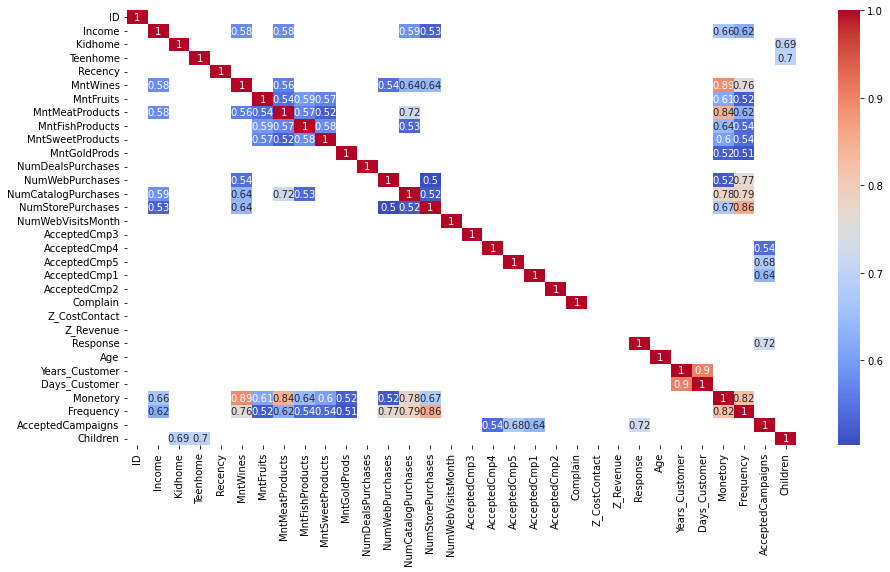

In [31]:
corr = customer.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr[corr > 0.5], annot = True, cmap = 'coolwarm')
plt.show()

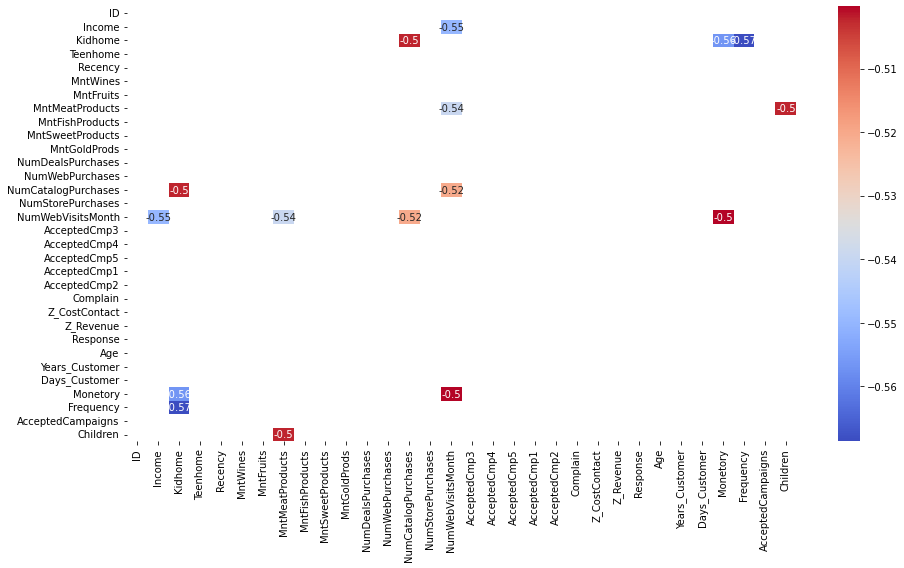

In [32]:
corr = customer.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr[corr < -0.5], annot = True, cmap = 'coolwarm')
plt.show()

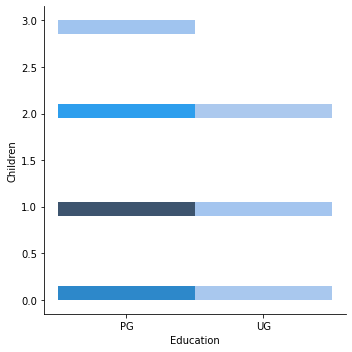

In [33]:
sns.displot(data=customer, y = "Children", x = "Education")

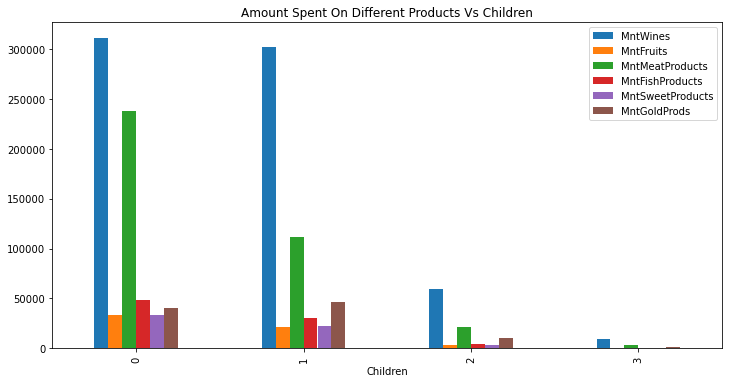

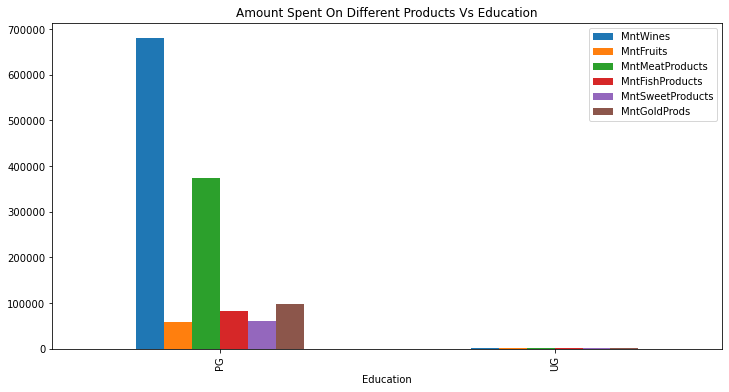

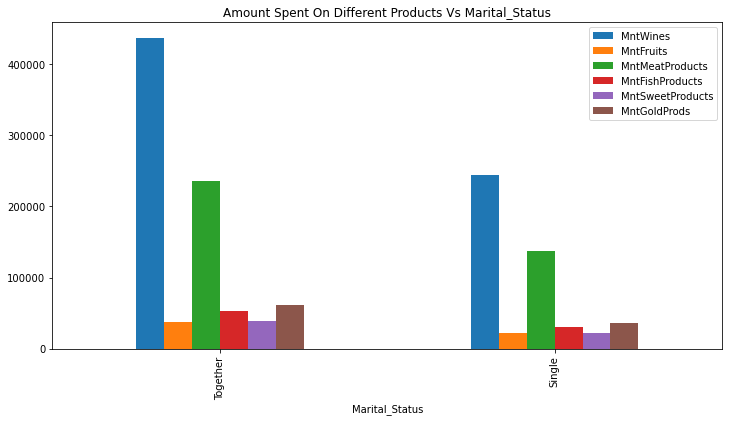

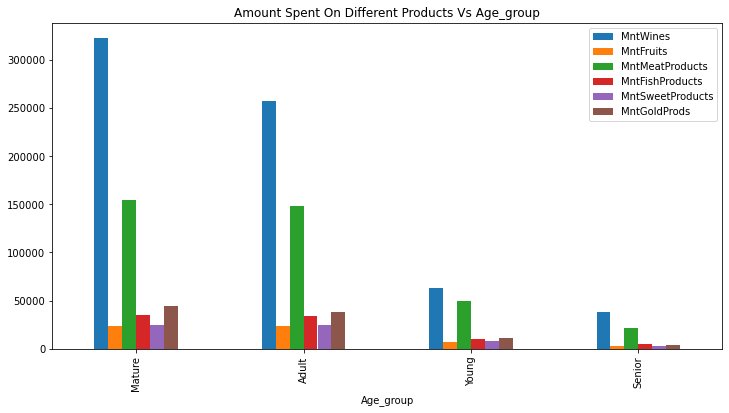

In [34]:
for col in ['Children','Education','Marital_Status','Age_group']:
    
    customer.groupby(col)[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().sort_values(by = 'MntSweetProducts' , ascending = False).plot(kind = 'bar', figsize = (12, 6))
    plt.title('Amount Spent On Different Products Vs '+col)
    plt.xticks(rotation = 90)

In [35]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Years_Customer,Days_Customer,Monetory,Frequency,AcceptedCampaigns,Children,Age_group,Seniority_group
0,5524,1957-01-01,PG,Single,58138.0,0,0,2012-04-09,58,635,...,1,57,2,971,1617,22,1,0,Mature,Old customers
1,2174,1954-01-01,PG,Single,46344.0,1,1,2014-08-03,38,11,...,0,60,0,125,27,4,0,2,Mature,New customers
2,4141,1965-01-01,PG,Together,71613.0,0,0,2013-08-21,26,426,...,0,49,1,472,776,20,0,0,Mature,Discovering customers
3,6182,1984-01-01,PG,Together,26646.0,1,0,2014-10-02,26,11,...,0,30,0,65,53,6,0,1,Young,New customers
4,5324,1981-01-01,PG,Together,58293.0,1,0,2014-01-19,94,173,...,0,33,0,321,422,14,0,1,Adult,New customers


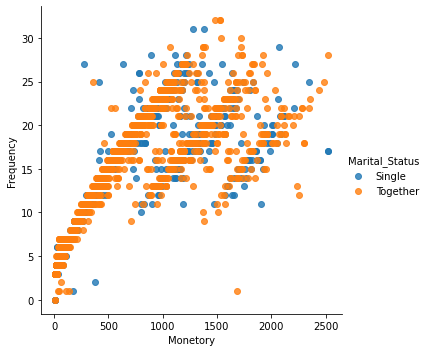

In [36]:
import seaborn as sns

sns.lmplot(x = 'Monetory', y = 'Frequency', hue = 'Marital_Status', 
           data = customer.loc[customer['Marital_Status'].isin(['Single', 'Together'])], 
           fit_reg = False)

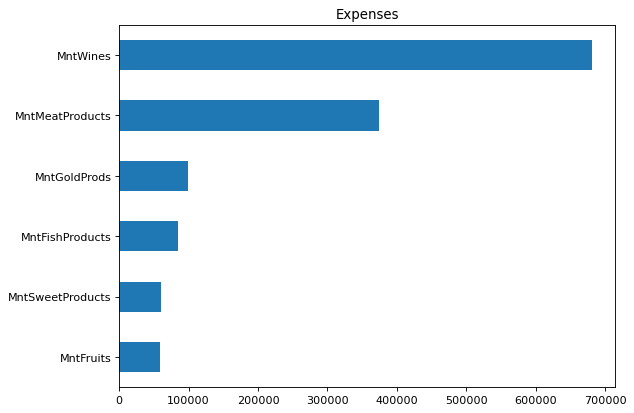

In [37]:
plt.figure(figsize = (8, 6), dpi = 80)
customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Expenses')
plt.show()

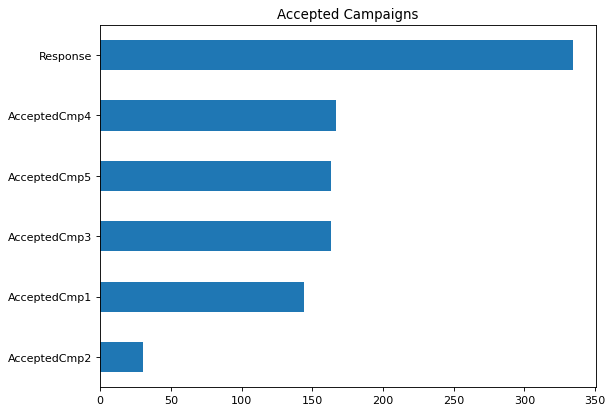

In [38]:
plt.figure(figsize = (8, 6), dpi = 80)
customer[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Accepted Campaigns')
plt.show()

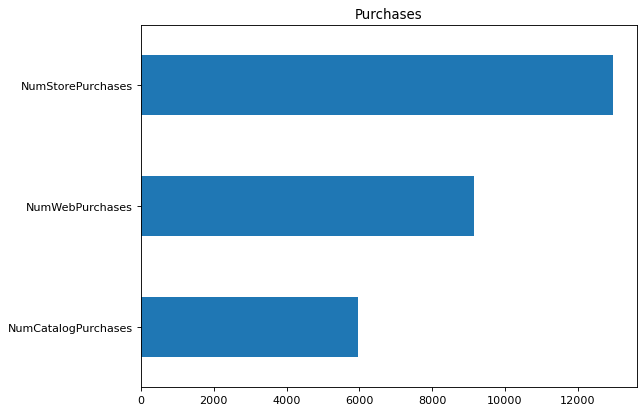

In [39]:
plt.figure(figsize = (8, 6), dpi = 80)
customer[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Purchases')
plt.show()

In [40]:
# Inferences :
# Most amount of money is spent on wine and meat by customers and minimum on fruits and sweets
# Majority of customers like to purchase through store
# The chances of accepting an offer in campaign increases with the number of campaigns, maximum amount of customers accepted the last campaign offer

In [41]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Years_Customer', 'Days_Customer', 'Monetory', 'Frequency',
       'AcceptedCampaigns', 'Children', 'Age_group', 'Seniority_group'],
      dtype='object')

In [42]:
customer.shape

(2240, 38)

In [43]:
# Seniority => For how long customer has been in a relationship with company

In [44]:
customer = customer.rename (columns= {'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweet', 'MntGoldProds': 'Gold', 'NumDealsPurchases': 'Deals', 'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalog', 'NumStorePurchases': 'Store', 'NumWebVisitsMonth': 'WebVisits'})
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Response,Age,Years_Customer,Days_Customer,Monetory,Frequency,AcceptedCampaigns,Children,Age_group,Seniority_group
0,5524,1957-01-01,PG,Single,58138.0,0,0,2012-04-09,58,635,...,1,57,2,971,1617,22,1,0,Mature,Old customers
1,2174,1954-01-01,PG,Single,46344.0,1,1,2014-08-03,38,11,...,0,60,0,125,27,4,0,2,Mature,New customers
2,4141,1965-01-01,PG,Together,71613.0,0,0,2013-08-21,26,426,...,0,49,1,472,776,20,0,0,Mature,Discovering customers
3,6182,1984-01-01,PG,Together,26646.0,1,0,2014-10-02,26,11,...,0,30,0,65,53,6,0,1,Young,New customers
4,5324,1981-01-01,PG,Together,58293.0,1,0,2014-01-19,94,173,...,0,33,0,321,422,14,0,1,Adult,New customers


In [45]:
customer = customer.copy().drop(['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Response', 'Z_CostContact', 'Z_Revenue', 'Age', 'Years_Customer', 'Days_Customer'], axis = 1)
customer.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,...,Catalog,Store,WebVisits,Complain,Monetory,Frequency,AcceptedCampaigns,Children,Age_group,Seniority_group
0,5524,PG,Single,58138.0,58,635,88,546,172,88,...,10,4,7,0,1617,22,1,0,Mature,Old customers
1,2174,PG,Single,46344.0,38,11,1,6,2,1,...,1,2,5,0,27,4,0,2,Mature,New customers
2,4141,PG,Together,71613.0,26,426,49,127,111,21,...,2,10,4,0,776,20,0,0,Mature,Discovering customers
3,6182,PG,Together,26646.0,26,11,4,20,10,3,...,0,4,6,0,53,6,0,1,Young,New customers
4,5324,PG,Together,58293.0,94,173,43,118,46,27,...,3,6,5,0,422,14,0,1,Adult,New customers


In [46]:
customer.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,...,Catalog,Store,WebVisits,Complain,Monetory,Frequency,AcceptedCampaigns,Children,Age_group,Seniority_group
0,5524,PG,Single,58138.0,58,635,88,546,172,88,...,10,4,7,0,1617,22,1,0,Mature,Old customers
1,2174,PG,Single,46344.0,38,11,1,6,2,1,...,1,2,5,0,27,4,0,2,Mature,New customers
2,4141,PG,Together,71613.0,26,426,49,127,111,21,...,2,10,4,0,776,20,0,0,Mature,Discovering customers
3,6182,PG,Together,26646.0,26,11,4,20,10,3,...,0,4,6,0,53,6,0,1,Young,New customers
4,5324,PG,Together,58293.0,94,173,43,118,46,27,...,3,6,5,0,422,14,0,1,Adult,New customers


In [47]:
# Recency is a measure of the time since customer's last purchase 
# Frequency is a measurement of how often a customer purchases in a given time frame  
# Monetary is a measurement of total sales revenue generated by the company from the customer

In [48]:
customer['Education'].value_counts()

PG    2186
UG      54
Name: Education, dtype: int64

In [49]:
customer['Marital_Status'].value_counts()

Together    1444
Single       796
Name: Marital_Status, dtype: int64

In [50]:
customer['Age_group'].value_counts()

Adult     976
Mature    925
Young     259
Senior     79
Name: Age_group, dtype: int64

In [51]:
customer['Seniority_group'].value_counts()

Discovering customers    565
New customers            560
Old customers            560
Experienced customers    555
Name: Seniority_group, dtype: int64

In [52]:
customer['AcceptedCampaigns'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: AcceptedCampaigns, dtype: int64

In [53]:
customer['Children'].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

In [54]:
# Creating dataframe based on seniority
# Considering 'Discovering customers' for analysis as it contains enough customers to get better clusters

In [55]:
df_seniority = customer[(customer['Seniority_group'] == 'Discovering customers')].reset_index(drop = True)
df_seniority = pd.DataFrame(customer[['ID', 'Recency', 'Frequency', 'Monetory']])
df_seniority.head()

,ID,Recency,Frequency,Monetory
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


In [56]:
df_seniority.describe()

,ID,Recency,Frequency,Monetory
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,49.109375,12.537054,605.798214
std,3246.662198,28.962453,7.205741,602.249288
min,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,24.000000,6.000000,68.750000
50%,5458.500000,49.000000,12.000000,396.000000
75%,8427.750000,74.000000,18.000000,1045.500000
max,11191.000000,99.000000,32.000000,2525.000000


In [57]:
# The above table gives the 5 -table summary of the all the columns of the newly selected dataframe of seniority_group.

In [58]:
# Depending on the granularity requirement of the company , each customer is scored on the RFM attributes on a scale of 1–3, 3 being the highest.

In [59]:
#  Quantile is where a sample is divided into equal size, adjacent subgroups

In [60]:
quantiles_recency = df_seniority.quantile(q = [0.25,0.50,0.75])
quantiles_recency

,ID,Recency,Frequency,Monetory
0.25,2828.25,24.0,6.0,68.75
0.50,5458.50,49.0,12.0,396.00
0.75,8427.75,74.0,18.0,1045.50


In [61]:
quantiles_recency = df_seniority.quantile(q = [0.25, 0.50, 0.75])


# Creating functions to determine the RFM score:
def R_score(customer):
    if customer < quantiles_recency['Recency'][0.25]:
        return 3
    elif customer < quantiles_recency['Recency'][0.75]:
        return 2
    else:
        return 1
    
def F_score(customer):
    if customer < quantiles_recency['Frequency'][0.25]:
        return 3
    elif customer < quantiles_recency['Frequency'][0.75]:
        return 2
    else:
        return 1    
    
    
def M_score(customer):
    if customer < quantiles_recency['Monetory'][0.25]:
        return 3
    elif customer < quantiles_recency['Monetory'][0.75]:
        return 2
    else:
        return 1   

In [62]:
df_seniority['R_score'] = df_seniority.Recency.apply(lambda x : R_score(x))
df_seniority['F_score'] = df_seniority.Frequency.apply(lambda x : F_score(x))
df_seniority['M_score'] = df_seniority.Monetory.apply(lambda x : M_score(x))
df_seniority['RFM_score'] = df_seniority['R_score'].map(str) + df_seniority['F_score'].map(str) + df_seniority['M_score'].map(str) 

In [63]:
df_seniority.head(10)

,ID,Recency,Frequency,Monetory,R_score,F_score,M_score,RFM_score
0,5524,58,22,1617,2,1,1,211
1,2174,38,4,27,2,3,3,233
2,4141,26,20,776,2,1,2,212
3,6182,26,6,53,2,2,3,223
4,5324,94,14,422,1,2,2,122
5,7446,16,20,716,3,1,2,312
6,965,34,17,590,2,2,2,222
7,6177,32,8,169,2,2,2,222
8,4855,19,5,46,3,3,3,333
9,5899,68,1,49,2,3,3,233


In [64]:
# Loyal Customers: RFM Score 333, 332, 232, 131, etc
# They’re important as they may or may not always spend the most, shopped with you recently, but they always come back. 
# These are customers who love your brand and products
# These customers should be cherished. 
# For your loyal customers, be sure to offer your loyalty program if you have one. 
# They’re also more likely to leave positive reviews, so ask for reviews after their purchases.
# Reward their loyalty often, and you’ll be able to transform these customers into your champions.


# Your High Potential and Can’t Lose Customers: RFM Score 113, 223, 123, etc
# They’re important as they may not purchase often, but these are your biggest spenders. 
# They might also just be holiday shoppers looking for deals. These customers might drop by once a year, but when they do, they make their presence felt.
# These customers should be nurtured: These customers already love your products
# If they have a low frequency score, send out campaigns with incentives to try to draw them back in more frequently.


# New Customers: RFM Score 313, 312, 311
# They’re important: You’ve done the hard work to convert them the first time, now it’s time to nurture that relationship. 
# Retaining these customers can be the best way to find new loyal customers and champions.


# At-Risk and About-to-Lose Customers: RFM Score 111, 112, 113
# They’re important as these customers are at risk of being lost as they haven’t purchased in some time. 
# The 111s might not be worth putting a lot of time and effort into. However, the 112s and 113s might still hold an opportunity for loyalty.

In [65]:
# Determining the distribution of variables

<AxesSubplot:ylabel='Density'>

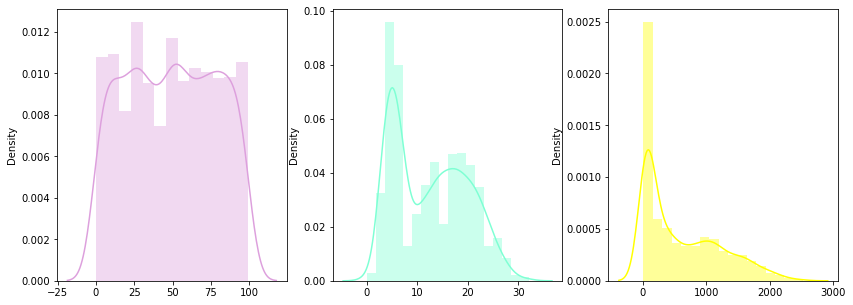

In [66]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 3, 1)
sns.distplot(x = df_seniority['Recency'], kde = True, color = 'plum')

plt.subplot(1,3,2)
sns.distplot(x = df_seniority['Frequency'], kde = True, color = 'aquamarine')

plt.subplot(1,3,3)
sns.distplot(x = df_seniority['Monetory'], kde = True, color = 'yellow')

In [67]:
df_seniority.skew()

ID           0.039832
Recency     -0.001987
Frequency    0.297114
Monetory     0.860841
R_score      0.023871
F_score      0.092400
M_score      0.000000
RFM_score    0.022634
dtype: float64

In [68]:
# Clearly, the variables 'Recency' and 'Frequency' are lying between [-0.5, 0.5] indicating that they are symmetric(Normally Distributed). 
# On the other hand, the skewness of the variable 'Monetory' is 0.88 indicating the data is highly skewed.

In [69]:
df_log = df_seniority.copy()
df_log['Monetory'] = np.log1p(df_log['Monetory'])
df_log.head()

,ID,Recency,Frequency,Monetory,R_score,F_score,M_score,RFM_score
0,5524,58,22,7.388946,2,1,1,211
1,2174,38,4,3.332205,2,3,3,233
2,4141,26,20,6.655440,2,1,2,212
3,6182,26,6,3.988984,2,2,3,223
4,5324,94,14,6.047372,1,2,2,122


Text(0.5, 1.0, 'After Transformation QQ-Plot')

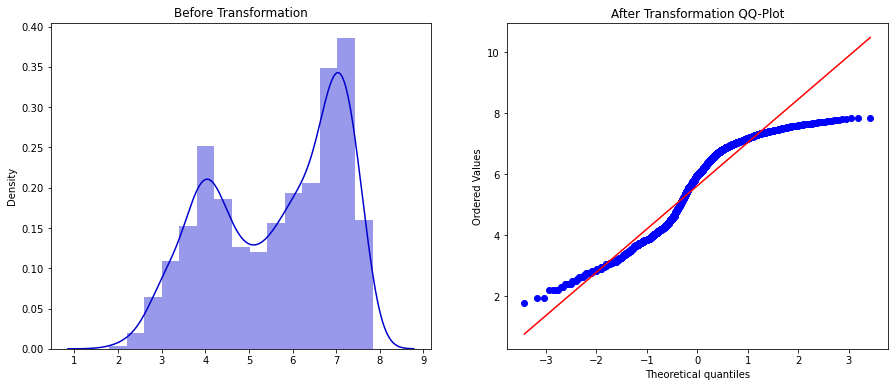

In [70]:
from scipy.stats import probplot

warnings.filterwarnings("ignore")
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(x = df_log['Monetory'], kde = True, color = "mediumblue")
plt.title('Before Transformation')

plt.subplot(1,2,2)
probplot(df_log['Monetory'], dist = 'norm', plot = plt)
plt.title("After Transformation QQ-Plot")

In [71]:
# As data for monetory was skewed, we had to perform transformation techniques on it
# Here we used 'log transformation' 
# In graph on right hand side as data points are lying along the line we can say that data for monetory is normally distributed 

In [72]:
# Scaling the features in the dataset

In [73]:
# Normalizing the data :

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df_seniority_norm = pd.DataFrame(scaler.fit_transform(df_log[['Recency', 'Frequency', 'Monetory']]))
df_seniority_norm.columns = ['Recency', 'Frequency', 'Monetory']

df_seniority_norm.head()

,Recency,Frequency,Monetory
0,0.585859,0.6875,0.926283
1,0.383838,0.1250,0.254929
2,0.262626,0.6250,0.804894
3,0.262626,0.1875,0.363620
4,0.949495,0.4375,0.704265


In [74]:
df_seniority_norm.describe()

,Recency,Frequency,Monetory
count,2240.000000,2240.000000,2240.000000
mean,0.496054,0.391783,0.633613
std,0.292550,0.225179,0.243356
min,0.000000,0.000000,0.000000
25%,0.242424,0.187500,0.405972
50%,0.494949,0.375000,0.693767
75%,0.747475,0.562500,0.854172
max,1.000000,1.000000,1.000000


In [75]:
# Model Building

In [76]:
# Considering various clustering algorithms

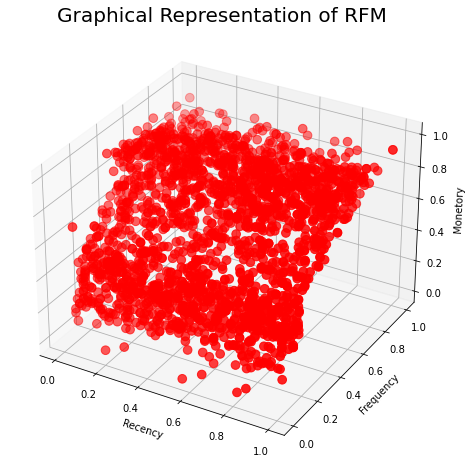

In [77]:
# Graphical represntation of RFM

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection = '3d')

im = ax.scatter(df_seniority_norm["Recency"], df_seniority_norm["Frequency"], df_seniority_norm["Monetory"],
               color = 'red', s = 75)       
plt.title('Graphical Representation of RFM ', fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [78]:
#  Here, we can observe that the datapoints do not follow any pattern rather have been clustered over a certain area clearly depicting it is a convex cluster.

In [79]:
# K - Means Clustering Algorithm :

# The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
# The K-Means Clustering Algorithm works well when the data is not skewed. 
# Moreover, it uses distance based measurements because of which it becomes extremely important to scale the data and also treats outliers as they are not robust.

In [80]:
# Define Kmeans Algorithm and returning the centroids, clusters, interia :

from sklearn.neighbors import NearestNeighbors

def Kmeans_algo(customer, n):
    
    kmeans_model = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300,
                         random_state = 42, algorithm = 'elkan')
    kmeans_model.fit(customer)
    
# Creating centroids:
    centroids = kmeans_model.cluster_centers_
    
# Creating labels:
    labels = kmeans_model.labels_
    df_seniority_norm['label'] = labels
    
# Evaluation metrics:
    interia = kmeans_model.inertia_
    sil_score = metrics.silhouette_score(customer, labels)
    
    return interia, labels, centroids, sil_score

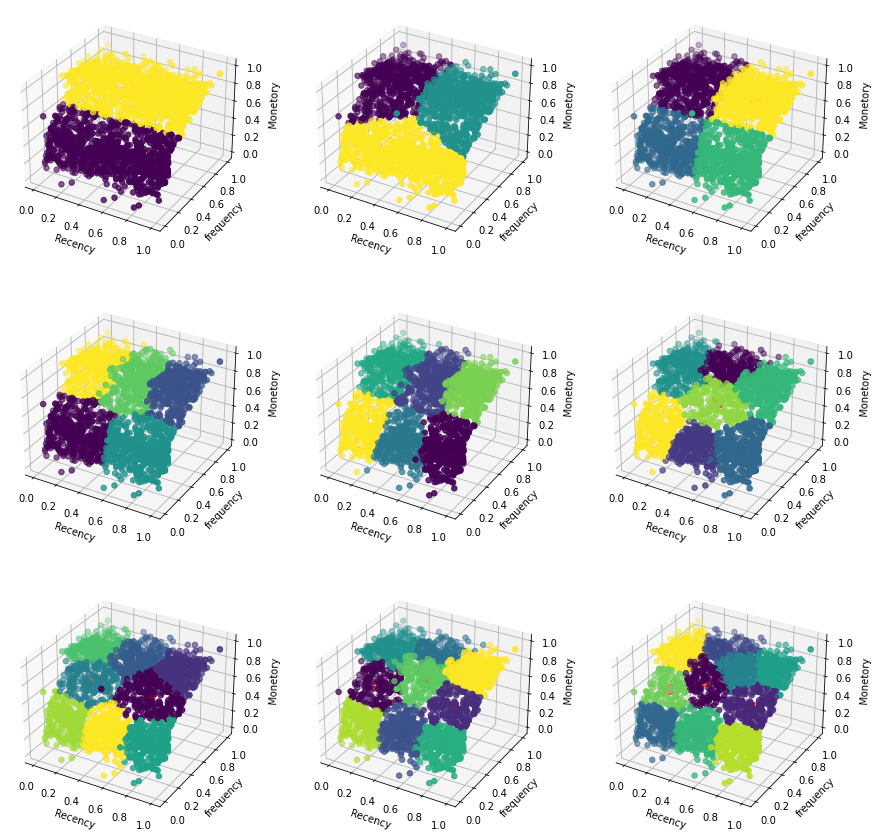

In [81]:
# Creating a dataframe :

from sklearn import metrics
from sklearn.cluster import KMeans

x3 = df_seniority_norm[['Recency', 'Frequency', 'Monetory']]

x3_interia_score = []
x3_s_score = []

fig = plt.figure(figsize = (15, 15))

# Call the function :

for i in range(2,11):
    x3_interia, x3_labels, x3_centroids, x3_sil_score = Kmeans_algo(x3, i)
    x3_interia_score.append(x3_interia)
    x3_s_score.append(x3_sil_score)
    centroids_df = pd.DataFrame(x3_centroids, columns = ['Recency', 'Frequency', 'Monetory'])
    
    ax = fig.add_subplot(330 + i - 1, projection = '3d')
    
# Scatter plot:
    ax.scatter(df_seniority_norm['Recency'], df_seniority_norm['Frequency'], df_seniority_norm['Monetory'],
                s = 30, c = df_seniority_norm["label"], cmap = "viridis")
    ax.scatter(centroids_df['Recency'], centroids_df['Frequency'], centroids_df['Monetory'], 
               s = 90, marker= ",", color = "r")
    ax.set_xlabel('Recency')
    ax.set_ylabel('frequency')
    ax.set_zlabel('Monetory')

In [82]:
# HyperParameter Tuning For K-Means:
# The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10)
# And then for each value of k, an average score is computed for all clusters

Text(0, 0.5, 'Inertia Values')

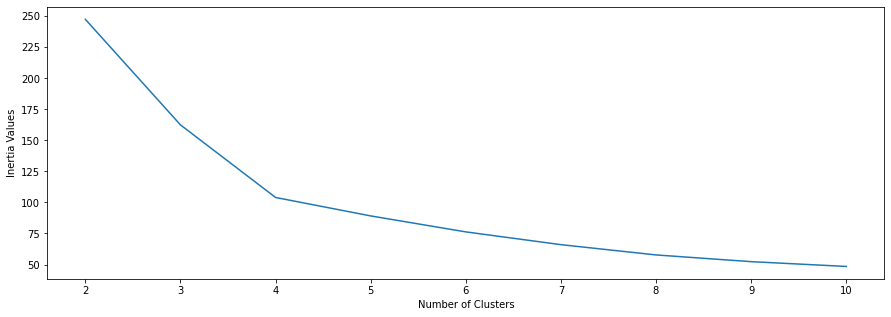

In [83]:
# Elbow method:

plt.figure(11, figsize = (15, 5))
plt.plot(np.arange(2, 11), x3_interia_score, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")    

In [84]:
kmeans_model = KMeans(4)

In [85]:
# The plot looks like an arm with a clear elbow at k = 4

Text(0, 0.5, 'Silhouette Score')

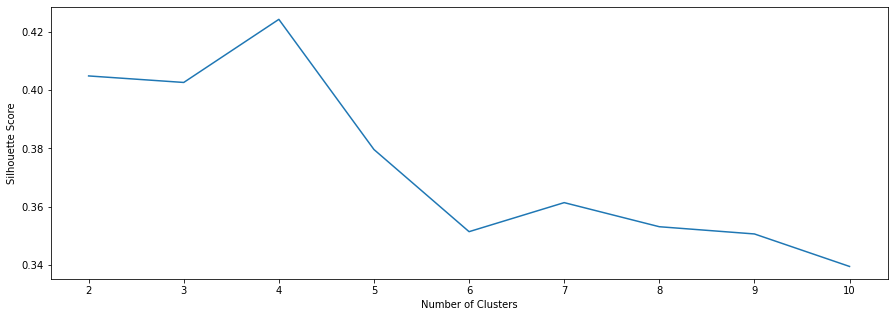

In [86]:
# Validation on the Number of Clusters that has been chosen by Silhouette Method:
# Plot inertia values against number of clusters

plt.figure(11, figsize = (15, 5))
plt.plot(np.arange(2, 11) , x3_s_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [87]:
# Inertia tells how far away the points within a cluster are. 
# Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up

In [88]:
# From the above graph, there is a clear peak at k = 4. Hence it is optimal

In [89]:
# Applying the Updated Algorithm :

d1 = df_seniority_norm[['Recency', 'Frequency', 'Monetory']]
model1 = KMeans(n_clusters = 4, max_iter = 400, random_state = 42)
model1.fit(d1)
d1['labels'] = model1.labels_

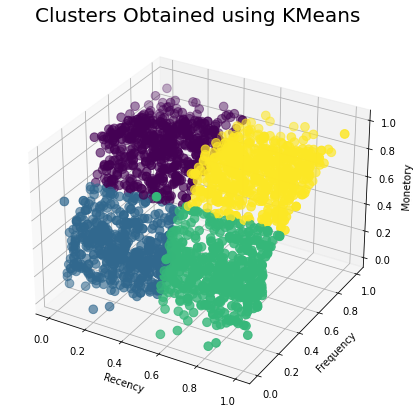

In [90]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(d1["Recency"], d1["Frequency"], d1["Monetory"],
               c = model1.labels_ , cmap = "viridis", s = 75)       
plt.title('Clusters Obtained using KMeans', fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [91]:
score1 = metrics.silhouette_score(d1[['Recency', 'Frequency', 'Monetory']], model1.labels_, metric = 'euclidean')
score1

0.4243779596795635

In [92]:
c1 = metrics.calinski_harabasz_score(d1[['Recency', 'Frequency', 'Monetory']], model1.labels_)
c1

2391.4854758581573

In [93]:
# DBSCAN Algorithm:
# DBSCAN is clustering algorithm which is ruboust to outliers or noise.
# Before the implementation of this algoritjm its very important we find the optimal value for two important parameters EPSILON and MNT POINTS.
# Epsilon : We will using the KNearestNeighbours to compute the average distance for each data point. 
#                  Therefore we need to first find the optimal value for the nearest neighbours to be considered.
# Minimum Points : Number of Dimensions * 2

In [94]:
df_seniority_dbscan = df_seniority_norm[['Recency', 'Frequency', 'Monetory']]
df_seniority_dbscan.head()

,Recency,Frequency,Monetory
0,0.585859,0.6875,0.926283
1,0.383838,0.1250,0.254929
2,0.262626,0.6250,0.804894
3,0.262626,0.1875,0.363620
4,0.949495,0.4375,0.704265


In [95]:
# Hyper Parameter Tuning:
# Determining the optimal Number of Minimum Points:

Mnt_pnts = len(df_seniority_dbscan.columns)*2
print('The Minimum Points under Consideration is :', Mnt_pnts)

The Minimum Points under Consideration is : 6


In [96]:
# Determine the optimal value for epsilon

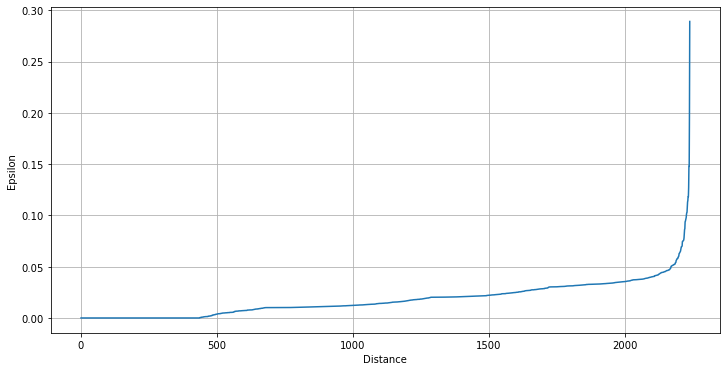

In [97]:
# Initially finding average distance using KNN:
neighbours = NearestNeighbors(n_neighbors = Mnt_pnts)
knn_data = neighbours.fit(df_seniority_dbscan)

# Obtaining indices and distances :
distances, indices = knn_data.kneighbors(df_seniority_dbscan)

# Sorting the distance:
sorting_distance = np.sort(distances, axis = 0)

# Sorted distance
sorted_distance = sorting_distance[:,1]

# Plotting between epsilon and distance
plt.figure(figsize = (12,6))
plt.plot(sorted_distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.grid()
plt.show()

In [98]:
# Here, the ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. 
# Zooming in on the k-distance plot, it looks like the optimal value for ε is around 0.100 to 0.150.
# We ended up looping through combinations of MinPts and ε values slightly above and below the values estimated here to find the model of best fit.

In [99]:
# The ideal value chose for Epsilon will be 0.125

In [100]:
# Applying the Updated Algorithm:
# Creating a dataframe and using DBSCAN algorithm:

from sklearn.cluster import DBSCAN

x1 = df_seniority_dbscan[['Recency', 'Frequency', 'Monetory']]
dbscan_model = DBSCAN(eps = 0.120, min_samples = Mnt_pnts).fit(df_seniority_dbscan)
df_seniority_dbscan['labels'] = dbscan_model.labels_
print('The Number of Clusters Obtained will be :')
print(df_seniority_dbscan['labels'].value_counts())

# Calculating Silhoutte Score:
print("")
score = metrics.silhouette_score(x1, dbscan_model.labels_)
print("The Silhoutte Score is:", score)

The Number of Clusters Obtained will be :
 0    2228
-1      12
Name: labels, dtype: int64

The Silhoutte Score is: 0.25420216782943056


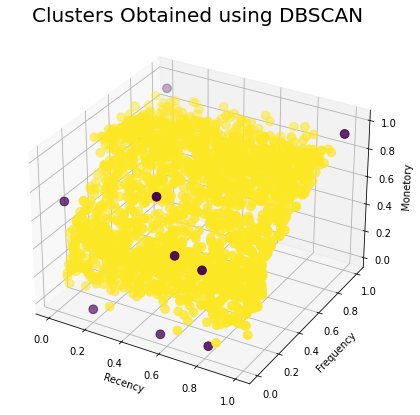

In [101]:
# Plotting :

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection = '3d')

ax.scatter(df_seniority_dbscan["Recency"], df_seniority_dbscan["Frequency"], df_seniority_dbscan["Monetory"],
               c = df_seniority_dbscan["labels"] , cmap ="viridis", s = 75)       
plt.title('Clusters Obtained using DBSCAN', fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [102]:
d2 = df_seniority_dbscan[['Recency','Frequency','Monetory']]
model2 = DBSCAN(eps = 0.120, min_samples = Mnt_pnts)
model2.fit(d2)

DBSCAN(eps=0.12, min_samples=6)

In [103]:
score2 = metrics.silhouette_score(d2, model2.labels_, metric = 'euclidean')
score2

0.25420216782943056

In [104]:
c2 = metrics.calinski_harabasz_score(d2, model2.labels_)
c2

0.32898981623495654

In [105]:
# Agglomerative Hierarchical clustering:
# It is a type of Clustering algorithm where clusters are successively merged based on the similarity measure until all clusters have been merged into one big cluster containing all objects

In [106]:
df_seniority_agglo = df_seniority_norm[['Recency', 'Frequency', 'Monetory']]
df_seniority_agglo.head()

,Recency,Frequency,Monetory
0,0.585859,0.6875,0.926283
1,0.383838,0.1250,0.254929
2,0.262626,0.6250,0.804894
3,0.262626,0.1875,0.363620
4,0.949495,0.4375,0.704265


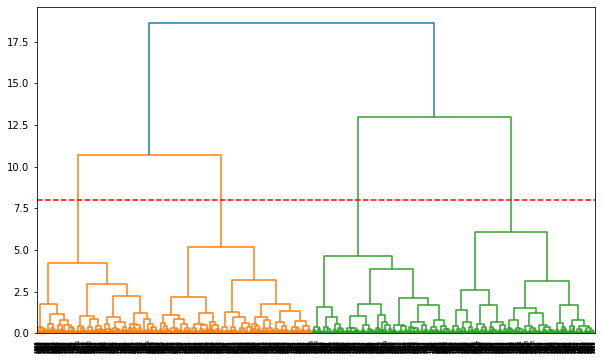

In [107]:
# Determining the Number of Clusters:

import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 6))
shc.dendrogram(shc.linkage(df_seniority_agglo, method = 'ward'))
plt.axhline(y = 8, color = 'r', linestyle = '--')
plt.show()

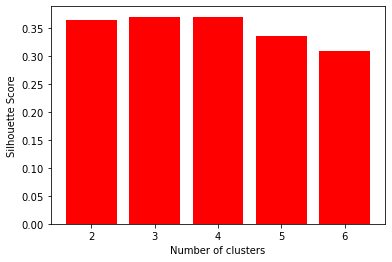

In [108]:
# Validation on the Number of Clusters Chose by Silhouette Method:

from sklearn.cluster import AgglomerativeClustering

agglo_s_score = []
x1 = df_seniority_agglo[['Recency','Frequency','Monetory']]

for n_cluster in range(2,7):
    agglo_s_score.append(metrics.silhouette_score(x1, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x1))) 
    
    
k = [2, 3, 4, 5, 6] 
plt.bar(k,agglo_s_score, color = 'red' ) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [109]:
# Clearly, the number of Clusters to be Chosen is 3

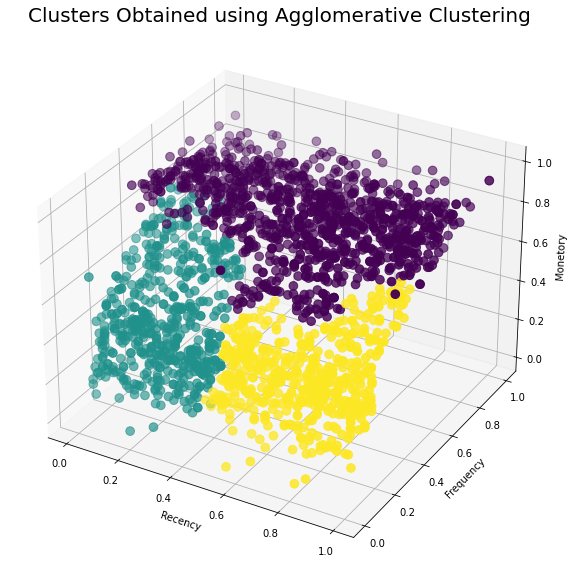

In [110]:
# Applying the Updated Algorithm :

x1 = df_seniority_agglo[['Recency', 'Frequency', 'Monetory']]


agglo_hier_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') 
agglo_hier_model.fit(df_seniority_agglo)
df_seniority_agglo['labels'] = agglo_hier_model.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_seniority_agglo["Recency"], df_seniority_agglo["Frequency"], df_seniority_agglo["Monetory"],
               c = df_seniority_agglo['labels'], cmap ="viridis", s = 75) 

plt.title('Clusters Obtained using Agglomerative Clustering', fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [111]:
d3 = df_seniority_agglo[['Recency', 'Frequency', 'Monetory']]
model3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') 
model3.fit(d3)

AgglomerativeClustering(n_clusters=3)

In [112]:
score3 = metrics.silhouette_score(d3, model3.labels_, metric = 'euclidean')
score3

0.3703839371048314

In [113]:
c3 = metrics.calinski_harabasz_score(d3, model3.labels_)
c3

1602.3837843577758

In [114]:
# Validation of the Clustering algorithms:
# Dataframe of Silhoutte Score:

validation_df = pd.DataFrame({'Algorithms': ['KMeans', 'DBSCAN', "Agglomerative Clustering"],
                              "Silhouette Score": [score1, score2, score3]})

# Dataframe of calinski:

validation_df_cal = pd.DataFrame({'Algorithms': ['KMeans', 'DBSCAN', "Agglomerative Clustering"],
                              "Calinski Score": [c1,c2,c3]})

<AxesSubplot:xlabel='Algorithms', ylabel='Calinski Score'>

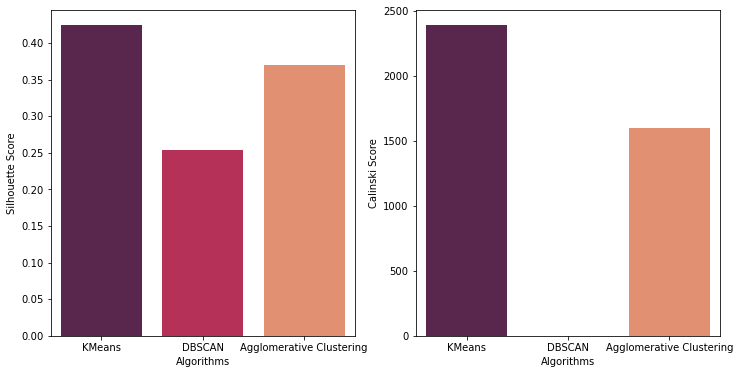

In [115]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = validation_df['Algorithms'], y = validation_df['Silhouette Score'], 
              palette = 'rocket')

plt.subplot(1, 2, 2)
sns.barplot(x = validation_df_cal['Algorithms'], y = validation_df_cal['Calinski Score'], 
              palette = 'rocket')

In [116]:
# Clearly, considering the above two scores we can conclude that KMeans is better fit model to our dataset

In [117]:
# Interpretation and Conclusion:
# Here, we choose KMeans Algorithm because of which we have 4 different clusters formed 
# It is now important we identify the clusters and group the customers accordingly

In [118]:
df1 = pd.DataFrame(df_seniority[['ID', 'Recency', 'Frequency', 'Monetory']])
df2 = pd.DataFrame(d1['labels'])

final_df = pd.concat([df1, df2], axis = 1)
final_df.head()

,ID,Recency,Frequency,Monetory,labels
0,5524,58,22,1617,3
1,2174,38,4,27,1
2,4141,26,20,776,0
3,6182,26,6,53,1
4,5324,94,14,422,3


In [119]:
# 'labels' column in above dataframe shows cluster to which particular customer belongs

In [120]:
final_df_cluster0 = final_df[(final_df['labels'] == 0)].reset_index()   
final_df_cluster0.describe()

,index,ID,Recency,Frequency,Monetory,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.0
mean,1101.890365,5722.242525,23.333887,18.247508,1015.098007,0.0
std,658.578496,3283.470044,14.279938,4.518794,513.807171,0.0
min,2.000000,1.000000,0.000000,9.000000,268.000000,0.0
25%,523.000000,2894.000000,11.000000,15.000000,569.250000,0.0
50%,1075.500000,5555.500000,24.000000,18.000000,970.000000,0.0
75%,1665.500000,8718.250000,35.000000,21.000000,1371.000000,0.0
max,2238.000000,11176.000000,48.000000,32.000000,2525.000000,0.0


In [121]:
final_df_cluster1 = final_df[(final_df['labels'] == 1)].reset_index()   
final_df_cluster1.describe()

,index,ID,Recency,Frequency,Monetory,labels
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.0
mean,1135.556863,5723.268627,24.562745,5.468627,81.680392,1.0
std,662.477774,3301.585627,14.748280,1.998525,66.805187,0.0
min,1.000000,35.000000,0.000000,0.000000,6.000000,1.0
25%,562.000000,2712.000000,12.000000,4.000000,35.000000,1.0
50%,1151.500000,5733.000000,24.000000,5.000000,59.000000,1.0
75%,1716.250000,8642.250000,37.000000,7.000000,103.000000,1.0
max,2239.000000,11191.000000,50.000000,11.000000,373.000000,1.0


In [122]:
final_df_cluster2 = final_df[(final_df['labels'] == 2)].reset_index()   
final_df_cluster2.describe()

,index,ID,Recency,Frequency,Monetory,labels
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.0
mean,1097.917969,5542.458984,74.603516,5.927734,101.099609,2.0
std,647.156019,3168.255353,14.588586,2.320810,105.403297,0.0
min,9.000000,9.000000,48.000000,0.000000,5.000000,2.0
25%,533.750000,2974.500000,62.750000,4.000000,41.000000,2.0
50%,1127.500000,5295.000000,76.000000,6.000000,67.000000,2.0
75%,1651.000000,8165.250000,86.000000,7.000000,134.750000,2.0
max,2234.000000,11188.000000,99.000000,11.000000,1679.000000,2.0


In [123]:
final_df_cluster3 = final_df[(final_df['labels'] == 3)].reset_index()
final_df_cluster3.describe()

,index,ID,Recency,Frequency,Monetory,labels
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.0
mean,1141.353896,5397.795455,73.431818,18.301948,1059.219156,3.0
std,621.691708,3225.970549,14.631914,4.276584,489.690311,0.0
min,0.000000,0.000000,49.000000,9.000000,309.000000,3.0
25%,633.500000,2725.500000,61.000000,15.000000,660.000000,3.0
50%,1134.500000,5203.500000,72.000000,18.000000,1003.500000,3.0
75%,1682.250000,8186.000000,87.000000,21.000000,1390.500000,3.0
max,2237.000000,11171.000000,99.000000,32.000000,2524.000000,3.0


<AxesSubplot:xlabel='labels', ylabel='count'>

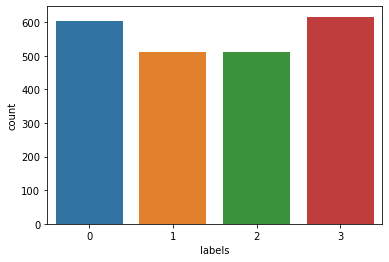

In [124]:
sns.countplot(x = 'labels', data = final_df)

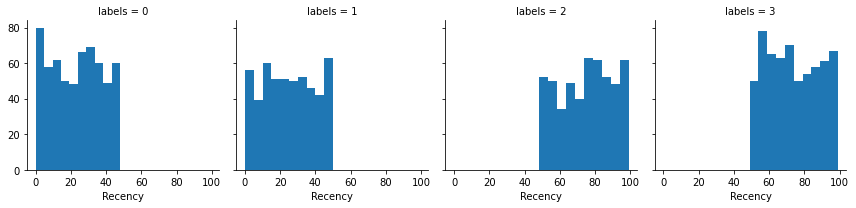

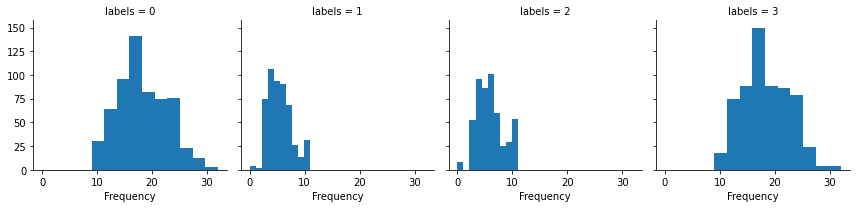

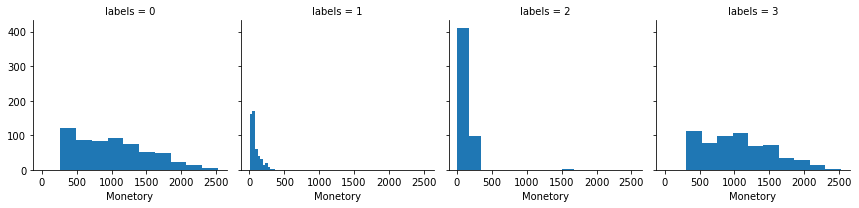

In [125]:
for c in final_df.drop(['ID', 'labels'], axis = 1):
    grid = sns.FacetGrid(final_df, col = 'labels')
    grid = grid.map(plt.hist, c)
    plt.show()

In [126]:
# Conclusion based on clusters formed

# Cluster0 => Customers having low recency, high frequency and high monetary
# Cluster1 => Customers having low recency, low frequency and low monetary
# Cluster2 => Customers having high recency, low frequency and low monetary
# Cluster3 => Customers having high recency, high frequency and high monetary

In [127]:
final_df.head()

,ID,Recency,Frequency,Monetory,labels
0,5524,58,22,1617,3
1,2174,38,4,27,1
2,4141,26,20,776,0
3,6182,26,6,53,1
4,5324,94,14,422,3


In [128]:
final_df['labels'] = final_df['labels'].replace(to_replace=0, value='Loyal')
final_df['labels'] = final_df['labels'].replace(to_replace=1, value='High Potential')
final_df['labels'] = final_df['labels'].replace(to_replace=2, value='New Customers')
final_df['labels'] = final_df['labels'].replace(to_replace=3, value='At-Risk')

final_df.head()

,ID,Recency,Frequency,Monetory,labels
0,5524,58,22,1617,At-Risk
1,2174,38,4,27,High Potential
2,4141,26,20,776,Loyal
3,6182,26,6,53,High Potential
4,5324,94,14,422,At-Risk


In [129]:
# Saving the K-Means clustering model and the data with cluster label
# Saving Scikitlearn models

import joblib
from sklearn.cluster import KMeans

joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [130]:
final_df.to_csv('Clustered_Customer_Data.csv')

In [131]:
# Training and Testing model accuracy using Decision Tree
# Split dataset

from sklearn.model_selection import train_test_split, cross_val_score

x = final_df.drop(['ID', 'labels'], axis = 1)
y = final_df[['labels']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [132]:
x_train

,Recency,Frequency,Monetory
1045,0,7,122
977,60,14,411
684,87,16,1146
2222,7,7,53
883,83,5,55
...,...,...,...
1958,60,27,1544
1839,55,22,1662
1127,94,5,78
310,86,7,53


In [133]:
x_test

,Recency,Frequency,Monetory
1910,32,21,1263
457,71,10,265
2057,10,23,1034
897,97,23,1638
66,0,3,11
...,...,...,...
1794,69,9,255
952,20,8,171
2078,82,6,97
1962,19,6,45


In [134]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [135]:
# Confusion Matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182   0   0   0]
 [  0 156   1   0]
 [  0   2 177   0]
 [  0   2   0 152]]
                precision    recall  f1-score   support

       At-Risk       1.00      1.00      1.00       182
High Potential       0.97      0.99      0.98       157
         Loyal       0.99      0.99      0.99       179
 New Customers       1.00      0.99      0.99       154

      accuracy                           0.99       672
     macro avg       0.99      0.99      0.99       672
  weighted avg       0.99      0.99      0.99       672



In [136]:
# Saving the decision tree model for fututre prediction

import pickle

filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [137]:
# Load the model from the disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result * 100, '% Accuracy')

99.25595238095238 % Accuracy


In [138]:
# Recency:

# 1 — long-standing customers.
# 2 — relatively recent customers.
# 3 — recent customers.


# Frequency:

# 1 — purchases rarely (single orders).
# 2 — purchases infrequently.
# 3 — purchases often.


# Monetary value

# 1 — low value of purchases.
# 2 — average value of purchases.
# 3 — high value of purchases.


# 1 in one of the categories
# Some of your customers may have a value of 122 (lame Recency). This segment should be given a little time to decide about returning to you. 
# Try to offer them products that are usually bought along with those that they purchased earlier in order to arouse a renewed interest in your company.


# 3 in one of the categories
# These users are a promising segment for your research. They’re consistent enough for you to experiment and find a suitable way to raise their other indicators